# Métricas de distancias

In [2]:
# Carga bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from sklearn import datasets

%matplotlib inline

In [3]:
# Genera N datos
N = 80

In [92]:
# Blobs de distinta varianza
Xblobs, Lblobs = datasets.make_blobs(n_samples=N, cluster_std=[1.0, 2.5, 0.5],
                                       random_state=170)


In [91]:
X   = Xblobs[Lblobs==0]
X_m = X.mean(axis=0)

plt.figure(figsize=(7,7))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(X[:,0],X[:,1],'ok',markersize=10,alpha=.8)
plt.plot(X_m[0],X_m[1],'or',markersize=15,alpha=.8)
plt.grid(True)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 80 but corresponding boolean dimension is 3000

### Distancia euclideana

In [5]:
k = 0
d = np.dot( X[k]-X_m, X[k]-X_m )
d = np.sqrt(d)
d

1.6408860559281804

In [13]:
D = np.dot( X-X_m, (X-X_m).T )
D = np.diag(D)
D = np.sqrt(D)
D

array([ 2.26860393,  2.21664465,  1.62734812,  0.60296596,  1.51249864,
        1.00217945,  1.81166059,  2.62638133,  0.74701989,  0.92953585,
        1.52460454,  1.0442721 ,  0.93222394,  1.69031793,  1.46192516,
        0.55368627,  1.56412668,  1.96634646,  0.27345295,  0.75061281,
        1.29380403,  0.9539263 ,  0.41094074,  1.1719893 ,  0.70649888,
        0.81382476,  0.59664219])

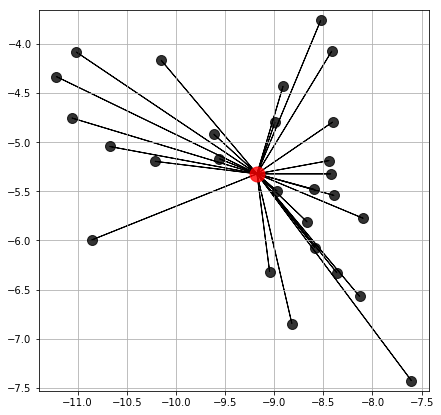

In [52]:
plt.figure(figsize=(7,7))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(X[:,0],X[:,1],'ok',markersize=10,alpha=.8)
plt.plot(X_m[0],X_m[1],'or',markersize=15,alpha=.8)
plt.grid(True)
for i,j in enumerate( X ):
    plt.arrow(X[i,0],X[i,1],X_m[0]-X[i,0],X_m[1]-X[i,1])

### No hay una media en agrupamientos

#### Paréntesis. Aumentar de dimensión un arreglo.

In [53]:
x = [0,1,2]*5
x = np.array(x)
l = np.array( [0,1,2] )
np.random.shuffle(x)

print(x);print(x.shape)
print(l);print(l.shape)

[2 1 0 0 2 2 1 0 2 2 0 1 1 1 0]
(15,)
[0 1 2]
(3,)


In [27]:
x==l

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [54]:
print( x[:,np.newaxis] ); print(x[:,np.newaxis].shape)

[[2]
 [1]
 [0]
 [0]
 [2]
 [2]
 [1]
 [0]
 [2]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]]
(15, 1)


In [35]:
mask = x[:,np.newaxis] == l[np.newaxis]

print( mask ); print(mask.shape) 

[[False False  True]
 [ True False False]
 [ True False False]
 [False False  True]
 [ True False False]
 [False  True False]
 [False False  True]
 [False False  True]
 [False  True False]
 [False False  True]
 [False  True False]
 [ True False False]
 [False  True False]
 [False  True False]
 [ True False False]]
(15, 3)


### Distancia euclideana entre todos los puntos

In [36]:
# Ejemplo toy
x  = np.array( [ [ 1,2],[2, 4] ] )
y  = np.array( [ [0,0],[0,-2],[-1,-1],[-1,0],[2,-4] ] )
print(x);print(y)
print(x.shape);print(y.shape)

[[1 2]
 [2 4]]
[[ 0  0]
 [ 0 -2]
 [-1 -1]
 [-1  0]
 [ 2 -4]]
(2, 2)
(5, 2)


In [37]:
print( x[:,:,np.newaxis].shape )
print( y[np.newaxis    ].shape )

(2, 2, 1)
(1, 5, 2)


In [9]:
D = x[:,:,np.newaxis] - np.transpose( y[np.newaxis],(0,2,1) )
D = np.transpose(D,(0,2,1))
print(D);print(D.shape)

[[[ 1  2]
  [ 1  4]
  [ 2  3]
  [ 2  2]
  [-1  6]]

 [[ 2  4]
  [ 2  6]
  [ 3  5]
  [ 3  4]
  [ 0  8]]]
(2, 5, 2)


In [10]:
D = np.square(D).sum(axis=-1)
print(D);print(D.shape)

[[ 5 17 13  8 37]
 [20 40 34 25 64]]
(2, 5)


### Ahora el mismo procedimiento pero aplicado a una matriz consigo misma

In [39]:
D = y[:,:,np.newaxis] - np.transpose( y[np.newaxis],(0,2,1) )
D = np.transpose(D,(0,2,1))
print(D);print(D.shape)

[[[ 0  0]
  [ 0  2]
  [ 1  1]
  [ 1  0]
  [-2  4]]

 [[ 0 -2]
  [ 0  0]
  [ 1 -1]
  [ 1 -2]
  [-2  2]]

 [[-1 -1]
  [-1  1]
  [ 0  0]
  [ 0 -1]
  [-3  3]]

 [[-1  0]
  [-1  2]
  [ 0  1]
  [ 0  0]
  [-3  4]]

 [[ 2 -4]
  [ 2 -2]
  [ 3 -3]
  [ 3 -4]
  [ 0  0]]]
(5, 5, 2)


In [40]:
D = np.square(D).sum(axis=-1)
print(D);print(D.shape)

[[ 0  4  2  1 20]
 [ 4  0  2  5  8]
 [ 2  2  0  1 18]
 [ 1  5  1  0 25]
 [20  8 18 25  0]]
(5, 5)


In [41]:
iD = np.argsort(D,axis=1)
print(iD)

[[0 3 2 1 4]
 [1 2 0 3 4]
 [2 3 0 1 4]
 [3 0 2 1 4]
 [4 1 2 0 3]]


In [42]:
for i,j in enumerate( iD[:,1] ):
    print( "%d, %d, %s, %s"%(i,j,y[i],y[j]) )

0, 3, [0 0], [-1  0]
1, 2, [ 0 -2], [-1 -1]
2, 3, [-1 -1], [-1  0]
3, 0, [-1  0], [0 0]
4, 1, [ 2 -4], [ 0 -2]


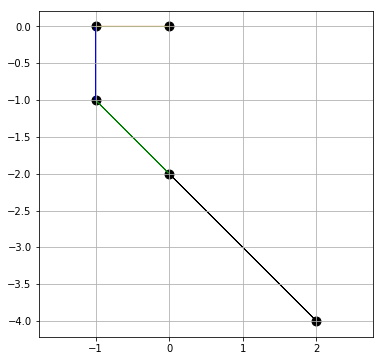

In [45]:
colors = ['r','g','b','y','k','orange']
plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(y[:,0], y[:,1], color='black',s=80)
plt.grid(True)
for i,(j,c) in enumerate( zip(iD[:,1], colors )  ):
    plt.arrow(y[i,0],y[i,1],y[j,0]-y[i,0],y[j,1]-y[i,1],color=c)

In [46]:
### Ahora aplicado a los datos sintéticos creados anteriormente

In [68]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))
D  = np.sqrt( np.square(D).sum(axis=-1) )
iD = np.argsort(D,axis=1)

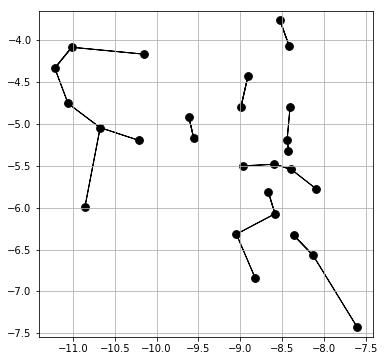

In [55]:
plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0], X[:,1], color='black',s=60)
plt.grid(True)
for i,j in enumerate( iD[:,1]  ):
    plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1])

IndexError: too many indices for array

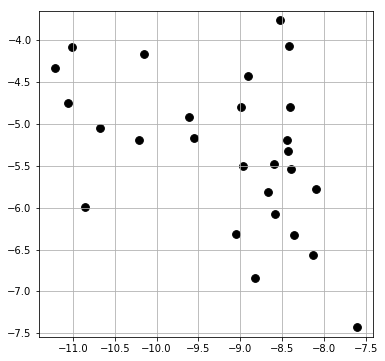

In [67]:
plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0], X[:,1], color='black',s=60)
plt.grid(True)
for i,j in enumerate( iD[:,1] ):
    if D[i,j]<.5:
        plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1],color='r')
    else:
        plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1],color='b')

## Distancia Mahalanobis

In [57]:
D  = y[:,:,np.newaxis] - np.transpose( y[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))
print(D);print(D.shape)

[[[ 0  0]
  [ 0  2]
  [ 1  1]
  [ 1  0]
  [-2  4]]

 [[ 0 -2]
  [ 0  0]
  [ 1 -1]
  [ 1 -2]
  [-2  2]]

 [[-1 -1]
  [-1  1]
  [ 0  0]
  [ 0 -1]
  [-3  3]]

 [[-1  0]
  [-1  2]
  [ 0  1]
  [ 0  0]
  [-3  4]]

 [[ 2 -4]
  [ 2 -2]
  [ 3 -3]
  [ 3 -4]
  [ 0  0]]]
(5, 5, 2)


In [58]:
i = 3
d = D[i]
C = np.linalg.inv( np.cov( d.T ) )
print(C)

[[ 2.46153846  1.53846154]
 [ 1.53846154  1.31868132]]


In [59]:
d = np.dot(d,C.T)
print(d)
print(d.shape)

[[-2.46153846 -1.53846154]
 [ 0.61538462  1.0989011 ]
 [ 1.53846154  1.31868132]
 [ 0.          0.        ]
 [-1.23076923  0.65934066]]
(5, 2)


In [60]:
d = np.dot( d,d.T )
print(d)

[[ 8.4260355  -3.20540997 -5.81572274  0.          2.01521555]
 [-3.20540997  1.58628185  2.39584591  0.         -0.03284627]
 [-5.81572274  2.39584591  4.10578433  0.         -1.02403091]
 [ 0.          0.          0.          0.          0.        ]
 [ 2.01521555 -0.03284627 -1.02403091  0.          1.949523  ]]


In [61]:
iD = np.argsort( np.abs(np.diag(d)) )
print(d); print(iD[1])

[[ 8.4260355  -3.20540997 -5.81572274  0.          2.01521555]
 [-3.20540997  1.58628185  2.39584591  0.         -0.03284627]
 [-5.81572274  2.39584591  4.10578433  0.         -1.02403091]
 [ 0.          0.          0.          0.          0.        ]
 [ 2.01521555 -0.03284627 -1.02403091  0.          1.949523  ]]
1


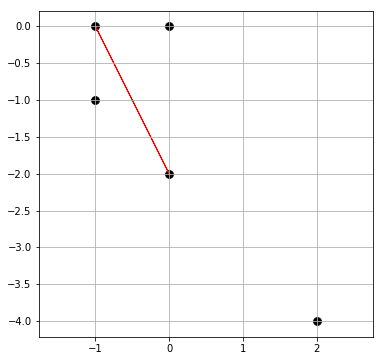

In [62]:
j = iD[1]

plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(y[:,0], y[:,1], color='black',s=60)
plt.arrow(y[i,0],y[i,1],y[j,0]-y[i,0],y[j,1]-y[i,1],color='r')
plt.grid(True)

In [63]:
sort = []
for i,d in enumerate(D):
    C  = np.linalg.inv( np.cov(d.T) )
    dp = np.dot(d ,C.T)
    dp = np.dot(dp,dp.T )
    dp = np.diag(dp)
    
    sort.append( np.argsort(dp)[1] )
    print(dp)
    print("")

print(sort)

[  0.          16.4231373   24.16326531   8.4260355    6.3451274 ]

[ 16.4231373    0.           0.90037435   1.58628185   3.6014974 ]

[ 24.16326531   0.90037435   0.           4.10578433   8.10336916]

[ 8.4260355   1.58628185  4.10578433  0.          1.949523  ]

[ 6.3451274   3.6014974   8.10336916  1.949523    0.        ]

[4, 2, 1, 1, 3]


IndexError: index 17 is out of bounds for axis 0 with size 5

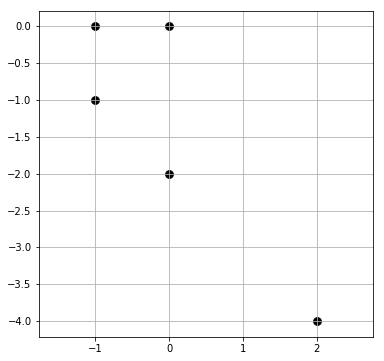

In [70]:
colors = ['r','g','b','y','k','orange']

plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(y[:,0], y[:,1], color='black',s=60)
plt.grid(True)
for i,(j,c) in enumerate( zip(sort,colors) ):
    plt.arrow(y[i,0],y[i,1],y[j,0]-y[i,0],y[j,1]-y[i,1],color=c)


In [65]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))

sort = []
for i,d in enumerate(D):
    C  = np.linalg.inv( np.cov(d.T) )
    dp = np.dot(d ,C.T)
    dp = np.dot(dp,dp.T )
    dp = np.diag(dp)
    
    sort.append( np.argsort(dp)[1] )
    #print(dp)
    #print("")

print( len(sort) )

27


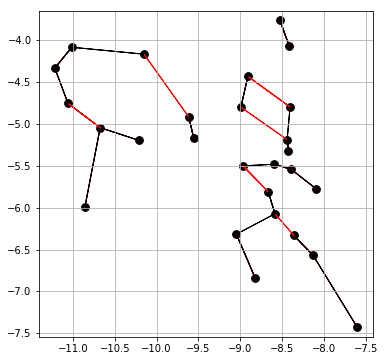

In [71]:
plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0], X[:,1], color='black',s=60)
plt.grid(True)
for i,(j,k) in enumerate( zip(sort,iD[:,1]) ):
    plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1],color='r')
    plt.arrow(X[i,0],X[i,1],X[k,0]-X[i,0],X[k,1]-X[i,1],color='k')

In [72]:
D.shape

(27, 27)

## Ejemplo completo

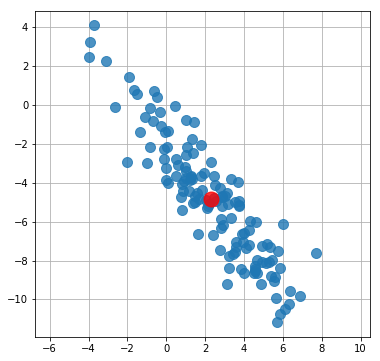

In [106]:
N                = 400
Xblobsv, Lblobsv = datasets.make_blobs(n_samples=N, random_state=170)
Xblobsv          = np.dot(Xblobsv, [[1.6, -2.8], [-2.2, 1.8]])

X   = Xblobsv[Lblobsv==2]
X_m = X.mean(axis=0)

plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(X[:,0],X[:,1],'o' ,markersize=10,alpha=.8)
plt.plot(X_m[0],X_m[1],'or',markersize=15,alpha=.8)
plt.grid(True)

In [107]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))

sort = []
for i,d in enumerate(D):
    C  = np.linalg.inv( np.cov(d.T) )
    dp = np.dot(d ,C.T)
    dp = np.dot(dp,dp.T )
    dp = np.diag(dp)
    
    sort.append( np.argsort(dp)[1] )
    #print(dp)
    #print("")

print( len(sort) )

133


In [108]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))
D  = np.sqrt( np.square(D).sum(axis=-1) )
iD = np.argsort(D,axis=1)

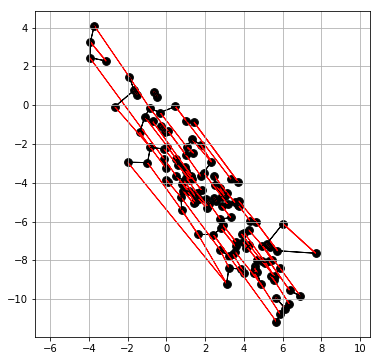

In [110]:
plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0], X[:,1], color='black',s=60)
plt.grid(True)
for i,(j,k) in enumerate( zip(sort,iD[:,1]) ):
    plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1],color='r')
    plt.arrow(X[i,0],X[i,1],X[k,0]-X[i,0],X[k,1]-X[i,1],color='k')


#### Anexo AL

In [8]:
l, E = np.linalg.eig(m)
print(l)
print(E)

[1.38196601 3.61803399]
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [9]:
n = 0
print( np.dot( m,E[:,n] ) )
print( l[n]*     E[:,n] )

[-1.1755705   0.72654253]
[-1.1755705   0.72654253]


In [10]:
n = 1
print( np.dot( m,E[:,n] ) )
print( l[n]*     E[:,n] )

[-1.90211303 -3.07768354]
[-1.90211303 -3.07768354]


In [11]:
l,E = np.linalg.eig( np.cov(X.T) )
print(l)
print(E)

[1.12589631 0.9650264 ]
[[ 0.96096542 -0.27666852]
 [ 0.27666852  0.96096542]]
